# CS2311-Data Structures and Algorithms in Python
## Homework 7B2b P  - Perform brand analysis on twitter data
## Due Date: See BlackBoard

## Student Name: Laura Moses

**SUBMISSION GUIDELINES**

1. First design, develop and test your code in a Jupyter notebook or other development environment
   - You can expirement and try different things in this notebook
2. Then copy your final code and markdown cells into the Jupyter Notebook file (.ipynb) provided for the assignment and submit to Blackboard
   - **Your submission file should be named HW7B2bTwitterAPI.ipynb**
   - I must be able to open and run your notebook in order to grade it
3. Note that the Jupyter notebook provided for final submission may contain testing code to help you check that your output and expected match.  
   - Follow the instructions in the notebook for copying your code and running the testing code
   - The instructor may run additional tests to check that your code runs correctly
4. If asked, also provide any supporting files or images requested in the assignment
   - If there are multiple files to submit you should zip the files into one folder and submit the folder

**GRADING CRITERIA:**
1. Good documentation/comments and program readability using both markdown cells and code comments
2. Algorithm/pseudo-code is explained in a markdown cell and is efficiently written
3. Program runs correctly for test cases with no syntax errors or logical errors

***The instructor should be able to reproduce your work from your notebook.***

### Note: Adapted from DataCamp webinar on Brand Analysis Using Social Media Data in R

# Brand Analysis Using Social Media Data in Python

Here we will learn how to perform brand analysis from social media data using Python. We will be using different Pyhon libraries to analyze twitter data and derive insights.

In this session, you will learn

* How to compare brand popularity by extracting and comparing follower counts
* How to promote a brand by identifying popular tweets
* How to evaluate brand salience and compare the same for two brands using tweet frequencies
* Understand brand perception through text mining and by visualizing key terms
* Perform sentiment analysis to understand customer's feelings and sentiments about a brand


## **The Dataset**

The datasets to be used in this training session are in CSV format. These datasets comprise extracted live tweets using the `tweepy` library. The datasets are:

* **"brand1.xlsx"**: Tweets searched on user timeline keyword 'brand1' pre-extracted from Twitter
* **"brand2.xlsx"**: Tweets searched on user timeline keyword 'brand2' pre-extracted from Twitter

In the first part of the assignment you extracted live tweets from Twitter by calling the Twitter web api on 'brand1' and 'brand2'. We will be using pre-extracted tweets saved in CSV format.

All the datasets have the same set of columns and some of the important columns that we will work with are listed below:

- `created_at`: UTC time when this Tweet was created
- `screen_name`: The screen name or twitter handle that an user identifies themselves with
- `text`: The actual tweet text posted by an user
- `retweet_count`: Number of times a given tweet has been retweeted.
- `follower_count`: The number of followers a twitter account currently has.

## **Getting started and installing packages**

In [1]:
# Import supporting packages
import pandas as pd
import numpy as np

# **1. Compare brand popularity by extracting and comparing follower counts**

We can compare followers count for competing brands by using their screen names and follower counts.

Note:
- `screen_name`: The screen name or twitter handle that an user identifies themselves with.
- `followers_count`: The number of followers a twitter account currently has.

The followers count for a twitter account indicates the popularity of that account and is a measure of social media influence.

We will call the Twitter API to do this part of the analysis.

In [2]:
# Load tweepy library
import tweepy

In [3]:
# before executing this cell, ensure that your copy of keys.py 
# contains your Twitter credentials as described earlier
import keys 

In [4]:
# Creating and Configuring an OAuthHandler to Authenticate with Twitter
auth = tweepy.OAuthHandler(keys.consumer_key,
                           keys.consumer_secret)
auth.set_access_token(keys.access_token,
                      keys.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

From the user data, extract details of screen names and follower counts for the twitter accounts into a dataframe.

In [5]:
# Compare these brands
brands = ['JoeBiden','realDonaldTrump',
          'Mike_Pence','EricTrump','IvankaTrump',
          'BarackObama','MichelleObama','HillaryClinton',
          'SpeakerPelosi','Oprah','CNN','FoxNews','MSNBC',
          'TuckerCarlson','SeanHannity','AndersonCooper','Maddow']

In [6]:
# Let's set up a dataframe with summary data about the twitter accounts. We can add additional columns as needed.
brands_df = pd.DataFrame(data = brands, columns=['screen_name'])

In [7]:
# get the followers_count using api.get_user().followers_count and assign to a new column in the brands dataframe.  
# You can try using a list comprehension for to set up the followers_count.

brands_df["followers_count"] = np.array([api.get_user(user).followers_count for user in brands])


In [8]:
# display brand_df sorted by follower_count in decending order
brands_df.sort_values("followers_count" ,ascending=False)

,screen_name,followers_count
5,BarackObama,126735767
1,realDonaldTrump,88851680
10,CNN,51183579
9,Oprah,43438469
7,HillaryClinton,29860948
11,FoxNews,20110382
0,JoeBiden,20033350
6,MichelleObama,18493580
16,Maddow,10455081
4,IvankaTrump,10215735


#### We can see that Barack Obama and Donald Trump have a very large number of followers

# **2. Promote a brand by identifying popular tweets using retweet counts**

Let's use tweet data from the "from_CNN.xlsx" file and look at popular tweets to identify potential promotional phrases and terms.

In [9]:
brand_name = 'from_CNN'

Load the tweet information into a dataframe.

In [10]:
brand_df = pd.read_excel(brand_name + '.xlsx', 'Sheet1',index_col=None)

In [11]:
# let's get a summary of the fields,types and missing
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      3000 non-null   int64         
 1   screen_name     3000 non-null   object        
 2   id              3000 non-null   int64         
 3   created_at      3000 non-null   datetime64[ns]
 4   follower_count  3000 non-null   int64         
 5   favorite_count  3000 non-null   int64         
 6   retweet_count   3000 non-null   int64         
 7   source          3000 non-null   object        
 8   text            3000 non-null   object        
 9   truncated       3000 non-null   bool          
 10  lang            3000 non-null   object        
 11  place           0 non-null      float64       
 12  geo             0 non-null      float64       
 13  coordinates     0 non-null      float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5), obj

In [12]:
# Explore the tweet dataframe
brand_df.shape

(3000, 14)

In [13]:
brand_df.head()

,Unnamed: 0,screen_name,id,created_at,follower_count,favorite_count,retweet_count,source,text,truncated,lang,place,geo,coordinates
0,0,CNN,1325121766700707843,2020-11-07 17:03:43,50698853,32975,4447,SocialFlow,BREAKING: Kamala Harris bursts through another...,True,en,NaN,NaN,NaN
1,1,CNN,1325119083315130378,2020-11-07 16:53:03,50698853,38825,8186,SocialFlow,Sen. Kamala Harris will be the United States’ ...,True,en,NaN,NaN,NaN
2,2,CNN,1325116848384389123,2020-11-07 16:44:10,50698853,33912,5705,SocialFlow,America has chosen Democrat Joe Biden as its 4...,True,en,NaN,NaN,NaN
3,3,CNN,1325116047297572869,2020-11-07 16:40:59,50698853,47533,12793,Twitter Media Studio,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...,True,en,NaN,NaN,NaN
4,4,CNN,1325114035092803584,2020-11-07 16:33:00,50698853,90132,28797,Twitter Media Studio,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...,True,en,NaN,NaN,NaN


Extract the columns `retweet_count` and `text` and save to a new dataframe

In [14]:
# Create a data frame of tweet text and retweet count
rtwt = brand_df[["retweet_count", "text"]]

# View few rows of the new dataframe
rtwt.head()

,retweet_count,text
0,4447,BREAKING: Kamala Harris bursts through another...
1,8186,Sen. Kamala Harris will be the United States’ ...
2,5705,America has chosen Democrat Joe Biden as its 4...
3,12793,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...
4,28797,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...


Sort in descending order of the retweet counts using `sort_values` method

In [15]:
# Sort data frame based on descending order of retweet counts
rtwt_sort = rtwt.sort_values("retweet_count" ,ascending=False)

# View sorted output
rtwt_sort.head()

,retweet_count,text
5,127065,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...
4,28797,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...
2697,22650,At least 10 people have died in protests over ...
3,12793,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...
670,11333,An 85-year-old primary school in Shanghai has ...


The `text` column usually contains duplicate tweets. To get unique tweets, we can use the `drop_duplicated()` method with the column(s) you are searching for.

In [16]:
# Exclude rows with duplicate text from sorted data frame
rtwt_unique = rtwt_sort.drop_duplicates(["text"])

In [17]:
# set column width to max size so we can see full contents of tweet
pd.set_option('display.max_colwidth', -1)

C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [18]:
# Print top 6 unique posts retweeted most number of times
rtwt_unique.head(6)

,retweet_count,text
5,127065,"BREAKING: JOE BIDEN WINS\n\nJoe Biden will be the 46th president of the United States, CNN projects, after a victory… https://t.co/HykSPDEnnH"
4,28797,"BREAKING: JOE BIDEN WINS\n\nJoe Biden will be the 46th president of the United States, CNN projects, after a victory… https://t.co/53CCmxH8z7"
2697,22650,"At least 10 people have died in protests over police brutality in Nigeria, Amnesty International says https://t.co/GLpHx05X8x"
3,12793,"BREAKING: JOE BIDEN WINS\n\nJoe Biden will be the 46th president of the United States, CNN projects, after a victory… https://t.co/GmpGz603wC"
670,11333,An 85-year-old primary school in Shanghai has been lifted off the ground — in its entirety — and relocated using ne… https://t.co/VxEJ7wFYLh
110,10783,"CNN PROJECTION: Joe Biden wins Michigan, reclaiming another ""blue wall"" state President Trump won in 2016 and narro… https://t.co/ZpNmZgejNf"


In [19]:
# reset column width
pd.set_option('display.max_colwidth', 50)

#### The most retweeted texts have popular quotes.  These tweets can be used for promoting brand loyalty.

# **3.	Evaluate brand salience and compare the same for two brands using tweet frequencies**

Brand salience is the extent to which a brand is continuously talked about.

Monitoring tweets on a certain brand over time is an excellent proxy to brand salience. Here, we will compare how tweets mentioning brand1 vs brand2 are present over time.

#### **3a) Visualizing frequency of tweets using time series plots**

Let's first visualize tweet frequency on brand1. Let's set up a dataframe for brand1.

In [20]:
brand1_name = 'from_CNN'

In [21]:
brand1_df = pd.read_excel(brand1_name+'.xlsx', 'Sheet1')

In [22]:
brand1_df.head(2)

,Unnamed: 0,screen_name,id,created_at,follower_count,favorite_count,retweet_count,source,text,truncated,lang,place,geo,coordinates
0,0,CNN,1325121766700707843,2020-11-07 17:03:43,50698853,32975,4447,SocialFlow,BREAKING: Kamala Harris bursts through another...,True,en,NaN,NaN,NaN
1,1,CNN,1325119083315130378,2020-11-07 16:53:03,50698853,38825,8186,SocialFlow,Sen. Kamala Harris will be the United States’ ...,True,en,NaN,NaN,NaN


In [23]:
# View the tweet dataframe. Drop the 'Unnamed: 0' column from the dataframe
brand1_df.drop(['Unnamed: 0'], axis = 1,inplace=True) 
brand1_df.head()

,screen_name,id,created_at,follower_count,favorite_count,retweet_count,source,text,truncated,lang,place,geo,coordinates
0,CNN,1325121766700707843,2020-11-07 17:03:43,50698853,32975,4447,SocialFlow,BREAKING: Kamala Harris bursts through another...,True,en,NaN,NaN,NaN
1,CNN,1325119083315130378,2020-11-07 16:53:03,50698853,38825,8186,SocialFlow,Sen. Kamala Harris will be the United States’ ...,True,en,NaN,NaN,NaN
2,CNN,1325116848384389123,2020-11-07 16:44:10,50698853,33912,5705,SocialFlow,America has chosen Democrat Joe Biden as its 4...,True,en,NaN,NaN,NaN
3,CNN,1325116047297572869,2020-11-07 16:40:59,50698853,47533,12793,Twitter Media Studio,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...,True,en,NaN,NaN,NaN
4,CNN,1325114035092803584,2020-11-07 16:33:00,50698853,90132,28797,Twitter Media Studio,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...,True,en,NaN,NaN,NaN


In [24]:
# View the `created_at` column in the tweet dataframe
brand1_df["created_at"].head(5)

0   2020-11-07 17:03:43
1   2020-11-07 16:53:03
2   2020-11-07 16:44:10
3   2020-11-07 16:40:59
4   2020-11-07 16:33:00
Name: created_at, dtype: datetime64[ns]

We see the `created_at` column has the timestamp that we'd need to convert to the correct date format using `pd.to_datetime().`  Using datetime datatypes allows you use the very powerful pandas timeseries methods for summarizing and plotting data.

In [25]:
# Let's add relevant data to the dataframe - Set up a column called 'Created' in pandas datetime format
brand1_df["Created"] = pd.to_datetime(brand1_df['created_at'])

Set up pandas series for id, favorite_count, retweet_count with `Created` as the index.  We can then plot these easily with the .plot() method for series objects.  Also set up a series called `tcnt` that has a value of one for each tweet and `Created` as the index.  This will allow us to sum and plot the number of tweets that occurred in a given time interval e.g. 24 hours.  We will use the `resample` method of pandas series with datetime indexes to sum the counts.  See Chapter 11 in McKinney to for more discussion on `resample`.

In [26]:
tuid = pd.Series(data=brand1_df['id'].values, index=brand1_df['Created'])
tfav = pd.Series(data=brand1_df['favorite_count'].values, index=brand1_df['Created'])            # likes
tret = pd.Series(data=brand1_df['retweet_count'].values, index=brand1_df['Created'])                                       # retweets

# use tz_localize(None) to remove time zone dependence of time series - suppresses warnings when downsampling
tcnt = pd.Series(data=np.ones(brand1_df.shape[0],dtype=int),                             # set to 1. We will count
                 index=brand1_df['Created'],name=brand1_name).tz_localize(None)          # tweets per time interval

In [27]:
# "downsample" data to on tweets to a time interval in which we can count tweets sent
tcnt_brand1 = tcnt.resample("1D").sum()

In [28]:
tcnt_brand1.head()

Created
2020-10-11     53
2020-10-12    113
2020-10-13    140
2020-10-14    154
2020-10-15    128
Freq: D, Name: from_CNN, dtype: int32

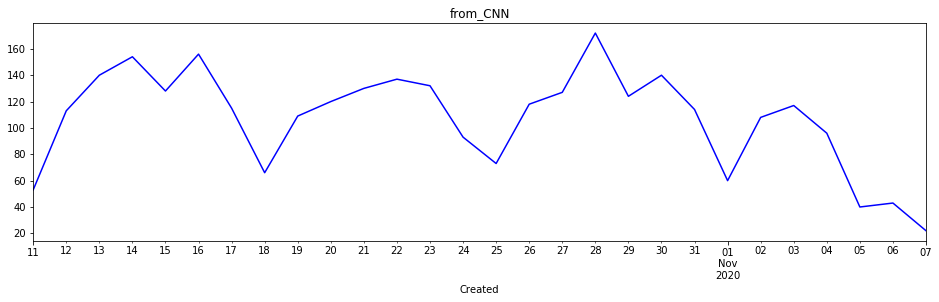

In [29]:
# Plot the downsampled data for brand 1
tcnt_brand1.plot(figsize=(16,4), color='b',title= brand1_name)

We see Daily tweets for CNN fluctuating from high to low. The high number of tweets could be related to an event or topic about CNN. We could investigate the tweet content for these days and evaluate positive and negative brand impacts.

#### **3b) Brand 2: Compare brand salience for two brands using time series plots and tweet frequencies**

In [30]:
brand2_name = 'from_FoxNews'

In [31]:
# Load data from excel
brand2_df = pd.read_excel(brand2_name+'.xlsx', 'Sheet1')

In [32]:
# View the tweet dataframe and drop the column called 'Unnamed: 0'
brand2_df.drop(['Unnamed: 0'], axis = 1,inplace=True) 
brand2_df.head()

,screen_name,id,created_at,follower_count,favorite_count,retweet_count,source,text,truncated,lang,place,geo,coordinates
0,FoxNews,1325127589246226433,2020-11-07 17:26:51,20085957,2826,419,Twitter Web App,Trump accuses Biden of 'rushing to falsely pos...,False,en,NaN,NaN,NaN
1,FoxNews,1325117280670388226,2020-11-07 16:45:53,20085957,32568,7739,Twitter Web App,"Fox News projects Biden to defeat Trump, becom...",True,en,NaN,NaN,NaN
2,FoxNews,1325110834914353154,2020-11-07 16:20:17,20085957,1962,338,Twitter Web App,White House Press Secretary Kayleigh McEnany i...,True,en,NaN,NaN,NaN
3,FoxNews,1325098452469100545,2020-11-07 15:31:04,20085957,777,85,Twitter Web App,https://t.co/AWC4PGYjt9,False,und,NaN,NaN,NaN
4,FoxNews,1325048999842377728,2020-11-07 12:14:34,20085957,1518,184,Twitter Web App,Georgia Republican incumbent Sen. David Perdue...,True,en,NaN,NaN,NaN


In [33]:
# Create a data frame of tweet text and retweet count
brand2_df.shape

(3000, 13)

We can see the extracted tweets on `brand2` and the `created_at` column has the timestamp.

In [34]:
# Update dates in `created_at` column with the new date format
brand2_df["Created"] = pd.to_datetime(brand2_df['created_at'])

# View the `created_at` column again
brand2_df["Created"].head()

0   2020-11-07 17:26:51
1   2020-11-07 16:45:53
2   2020-11-07 16:20:17
3   2020-11-07 15:31:04
4   2020-11-07 12:14:34
Name: Created, dtype: datetime64[ns]

Set up pandas series for id, favorite_count, retweet_count with `Created` as the index.  We can then plot these easily with the .plot() method for series objects.  Also set up a series called `tcnt` that has a value of one for each tweet and `Created` as the index.  This will allow us to sum and plot the number of tweets that occurred in a given time interval e.g. 24 hours.  We will use the `resample` method of pandas series with datetime indexes to sum the counts.  See Chapter 11 in McKinney to for more discussion on `resample`.

In [35]:
tuid = pd.Series(data=brand2_df['id'].values, index=brand2_df['Created'])
tfav = pd.Series(data=brand2_df['favorite_count'].values, index=brand2_df['Created'])            # likes
tret = pd.Series(data=brand2_df['retweet_count'].values, index=brand2_df['Created'])                                       # retweets

# use tz_localize(None) to remove time zone dependence of time series - suppresses warnings when downsampling
tcnt = pd.Series(data=np.ones(brand2_df.shape[0],dtype=int),                             # set to 1. We will count
                 index=brand2_df['Created'],name=brand2_name).tz_localize(None)          # tweets per time interval

# "downsample" data to on tweets to a time interval in which we can count tweets sent
tcnt_brand2 = tcnt.resample("1D").sum()

In [36]:
tcnt_brand2.head()

Created
2020-04-21     3
2020-04-22    10
2020-04-23    10
2020-04-24     7
2020-04-25     6
Freq: D, Name: from_FoxNews, dtype: int32

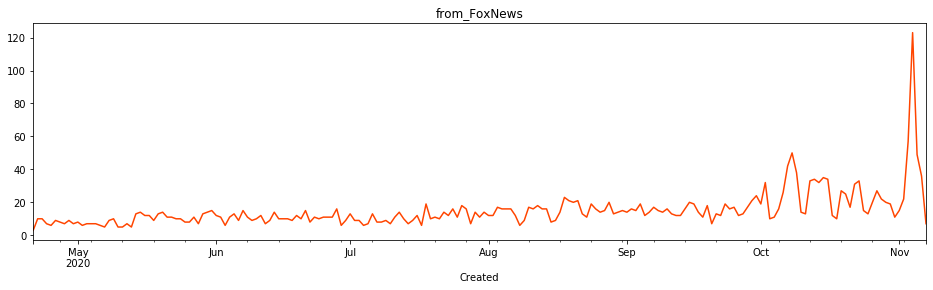

In [37]:
# downsample data to on tweets to a time interval in which we can count tweets sent
tcnt_brand2.plot(figsize=(16,4), color='orangered',title= brand2_name)

To visualize the number of tweets over time, we aggregate both `brand1` and `brand2` into time series objects.

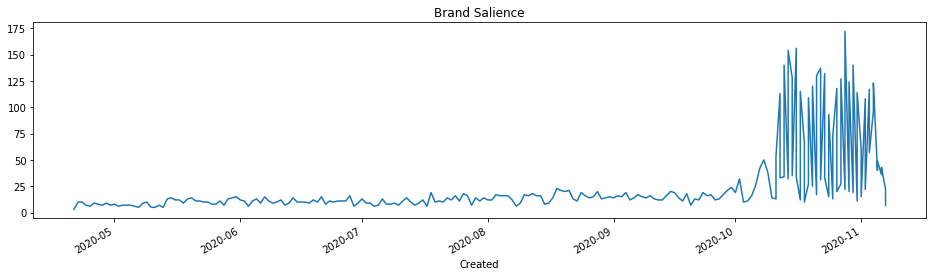

In [38]:
# Concatenate the two series into a dataframe that we can plot. Use pd.concat() and plot the dataframe.
pd.concat([tcnt_brand1, tcnt_brand2]).plot(figsize=(16,4),title="Brand Salience")

#### It's interesting to see which brand has relatively more tweets.

#### Higher level of tweet activity for a brand indicates a stronger brand salience vs the other brand. 

#### Visualizing tweets through time series analysis provides good insights on interest level on a product and can be used to compare brand salience.

# **4. Understand brand perception through text mining and by visualizing key terms**



One of the most important and common tasks in social media data analysis is being able to understand what users are tweeting about the most and how they perceive a particular brand. 

In this section, we will visualize the most common words mentioning a `brand` to build a word cloud that showcases the most common words.

### **4a) Processing tweets and twitter data**

Tweets are unstructured, noisy, and raw, and properly processing them is essentially to accurately capture useful brand-perception information. 

Here are some processing steps we will be performing:
* Step 1: Remove URLs from text
* Step 2: Remove special characters, punctuations, and numbers
* Step 3: Convert the text to a Corpus (i.e. large document of text)
* Step 4: Convert all letters in the Corpus to lower case
* Step 5: Remove common words (the, a, and ...), also called stop words, from the Corpus
* Step 6: Remove custom stop words from the Corpus
* Step 7: Trim leading and trailing spaces from Corpus

First, extract the tweets stored in the `text` column of the tweet dataframe for Tesla.

### tweet-preprocessor Constants for Cleaning Options

| Option	| Option constant
| :---	| :---
| @-Mentions (e.g., `@nasa`)	| `OPT.MENTION` 
| Emoji	| `OPT.EMOJI` 
| Hashtag (e.g., `#mars`)	| `OPT.HASHTAG` 
| Number	| `OPT.NUMBER` 
| Reserved Words (`RT` and `FAV`)	| `OPT.RESERVED` 
| Smiley	| `OPT.SMILEY` 
| URL	| `OPT.URL` 

**Step 1: Remove URLs, special characters, punctuations, and numbers**

Use the preprocessor library to clean tweets

In [39]:
import preprocessor as p
from importlib import reload
reload(p)

# example of cleaning the text for a tweet
p.set_options(p.OPT.MENTION,p.OPT.EMOJI,p.OPT.HASHTAG,p.OPT.NUMBER,p.OPT.RESERVED,p.OPT.SMILEY,p.OPT.URL)
tweet_text = 'RT A 23  #sample sample \n retweet with a URL https://nasa.gov\n'
out = p.clean(tweet_text)
print(out)

A sample retweet with a URL


In [40]:
# remember which brands we ar working with
print("Brand1 = ",brand1_name)
print("Brand2 = ",brand2_name)

Brand1 =  from_CNN
Brand2 =  from_FoxNews


In [41]:
# select which brand to work with
brand_name = brand2_name
if brand_name == brand1_name:
    wk_df = brand1_df.copy()
else:
    wk_df = brand2_df.copy()

In [42]:
#clean the tweets. Use the .apply() method with the p.clean function from the preprocessor library.
wk_df["clean_text"]=wk_df["text"].apply(p.clean)

In [43]:
wk_df["clean_text"].head()

0    Trump accuses Biden of 'rushing to falsely pos...
1    Fox News projects Biden to defeat Trump, becom...
2    White House Press Secretary Kayleigh McEnany i...
3                                                     
4    Georgia Republican incumbent Sen. David Perdue...
Name: clean_text, dtype: object

In [44]:
# Extract tweet text from the dataset and save to csv text file so we can create a corpus for NLTK library
wk_df["clean_text"].to_csv('clean_'+ brand_name+ '.txt', header=True, index=None, sep=' ')

**Step 3: Building a Corpus**

A Corpus is a list of text documents and is often used in text processing functions. To create a corpus, we will be using the `textblob` library and the methods associated with the TextBlob object.

We will use the pathlib library to import Path to locate a our file and read the text.

If you don't have pathlib installed you can go to the anaconda prompt and enter:
<pre>
conda install -c menpo pathlib
</pre>



In [45]:
# test example
from pathlib import Path
from textblob import TextBlob

# set up a simple corpus as an example
blob = TextBlob("this is a beautiful day of varieties. Tomorrow will be nice too.")

# print the directory for the blob to see a quick summary of the methods available.abs
print(dir(blob))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cmpkey', '_compare', '_create_sentence_objects', '_strkey', 'analyzer', 'classifier', 'classify', 'correct', 'detect_language', 'ends_with', 'endswith', 'find', 'format', 'index', 'join', 'json', 'lower', 'ngrams', 'noun_phrases', 'np_counts', 'np_extractor', 'parse', 'parser', 'polarity', 'pos_tagger', 'pos_tags', 'raw', 'raw_sentences', 'replace', 'rfind', 'rindex', 'sentences', 'sentiment', 'sentiment_assessments', 'serialized', 'split', 'starts_with', 'startswith', 'string', 'strip', 'stripped', 'subjectivity', 'tags', 'title', 'to_json', 'tokenize', 'tokenizer', 'tokens', 'tra

In [46]:
# load the cleaned twitter text to a TextBlob blob for cleansing and analysis.
blob = TextBlob(Path('clean_'+ brand_name+ '.txt').read_text())

**Step 4: Trim leading and trailing spaces from Corpus**

To remove additional spaces and create a clean corpus, use the `.strip()` method for the blob.

The additional spaces are now removed from the corpus.

In [47]:
# remove leading and trailing white space
blob_strip = blob.strip()

**Step 5: Convert Corpus to lower case**

To have all words in our corpus being uniform, we will lower all words in the Corpus to lower case. To do this, will use the `.lower()` method of the blob which applies a transformation to the corpus. 

In [48]:
# set text to lower case
blob_lwr = blob_strip.lower()

All characters in the corpus are now converted to lowercase.

**Step 6:  Remove stop words from the Corpus**

Stop words are commonly used words like `"a"`, `"an"`, `"the"` etc. They are often the most common words and tend to skew your analysis if left in the corpus. 

We will remove English stop words from the Corpus by importing stopwords from the `nltk.corpus` library.  We can then call stoppword.words('english') to get the common English stop words.  We will use set() to collect the unique words.

In [49]:
#import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stops = stopwords.words('english')
stops = set(stops)

In [50]:
from textblob import TextBlob

In [51]:
# Remove the stopwords from the corpus. Use a list comprehension to select the words that are not in stops
word_list = [word for word in blob_lwr.words if word not in stops]

The common stop words are now removed from the corpus.

**Step 7: Remove custom stop words from the Corpus**

In the corpus, frequently appearing terms like `sure`, `can`, `will`  etc do not add any value for analysis and can be removed to create a meaningul, refined corpus.

To do this, first extract a list of most frequent terms and their number of occurrences (also called term frequency) by settting up a dictionary of word counts and loading it into a sorted dataframe for inspection.

In [52]:
# Extract term frequencies for top 60 words in the Corpus and view the output
wordcount = {}

# set up a dictionary with word as key and count as the value and go through the word list to populate the dictionary
# words and count for the word.
for word in word_list:
    word_freq = word_list.count(word)
    wordcount[word] = word_freq

# Set up a list of the words, and a list of the counts, and then set up a dictionary with Word and Count coulmns.
# Create a dataframe from this dictionary.
word_dict = {}
word_dict["Word"]  = [word for word in wordcount.keys()]
word_dict["Count"] = [count for count in wordcount.values()]

# Use the dataframe constructor on the dictionary
df_freq_clean = pd.DataFrame(word_dict)


# sort the values in descending order of count and show the top 60
df_freq_clean.sort_values(by="Count", ascending = False).head(60)

,Word,Count
1,trump,235
3,biden,208
160,'s,169
139,election,97
110,says,88
12,fox,80
13,news,69
1261,coronavirus,60
1773,debate,58
73,senate,51


We can see high frequencies for custom stop words like `tesla`, `'s`, `n't`, `elon`.

Create of vector of such high frequency custom stop words.

In [53]:
# Create a list of custom stop words - you can edit this list if you want
custom_stops = ["'s","n't","'re","'m",'let','go','going','im','get','de',"dont","'ve","'ll","donald",
                "dr","may","sen","day","say","joe","first","could","says","one","two","three","amy","said"]

In [54]:
# Remove custom stop words and create a refined corpus. Use set() and set.union() to collect the unique items.
stops_cleaned = stops.union(set(custom_stops))

# Remove the stopwords from the corpus
word_list_clean = [word for word in word_list if word not in stops_cleaned]


The corpus now has only important terms as the common and user-defined custom stop words have been removed.

Check the frequently occuring top 60 words again to see if we get a different list.

In [55]:
# Extract term frequencies for top 60 words in the cleaned word list and view the output
wordcount = {}

for word in word_list_clean:
    word_freq = word_list.count(word)
    wordcount[word] = word_freq

# Set up a list of the words, and a list of the counts, and then set up a dictionary with Word and Count coulmns.
# Create a dataframe from this dictionary.
word_dict = {}
word_dict["Word"]  = [word for word in wordcount.keys()]
word_dict["Count"] = [count for count in wordcount.values()]

# Use the dataframe constructor on the dictionary
df_freq_clean = pd.DataFrame(word_dict)


# sort the values in descending order of count and show the top 60
df_freq_clean.sort_values(by="Count", ascending = False).head(60)

,Word,Count
1,trump,235
3,biden,208
136,election,97
12,fox,80
13,news,69
1240,coronavirus,60
1750,debate,58
71,senate,51
338,court,48
18,president,47


### **4b) Visualizing brand perception**

The most frequently used words in tweets are typically popular terms relevant to the topic tweeted.

In this exercise, we will extract and visualize popular terms in our refined corpus using the word cloud.


**Identify top 15 words spoken about the brand**

Extract and view the term frequency for the top 15 words from the refined corpus.

In [56]:
# Extract term frequencies for the top 15 words
df_top_15 = df_freq_clean.sort_values(by="Count", ascending = False).head(15)
df_top_15

,Word,Count
1,trump,235
3,biden,208
136,election,97
12,fox,80
13,news,69
1240,coronavirus,60
1750,debate,58
71,senate,51
338,court,48
18,president,47


Show a qick bar plot of the word frequency by sorting the words in decending order and calling the `plot.barh()` method of the dataframe.

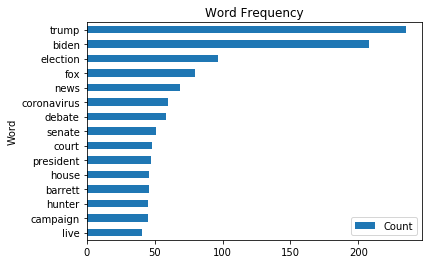

In [57]:
df_top_15.sort_values("Count",ascending=True).plot.barh(x="Word",y="Count",title="Word Frequency")

The popular terms related to tweets on the brand can be seen here.

The brand promotion team can analyze these terms to understand the pulse of the audience.

**Visualize popular terms with word clouds**

A word cloud is an image made up of words in which the size of each word indicates its frequency.


The `WordCloud()` function from the `wordcloud` library is used to create word clouds and it takes the following arguments:

* The Corpus
* `max_words` set to include only terms with a minimum frequency
* `colormap` set to "plasma"
* `min_font_size` set to the range of font sizes
* `random_state` set to FALSE to fix the word pattern in the word cloud

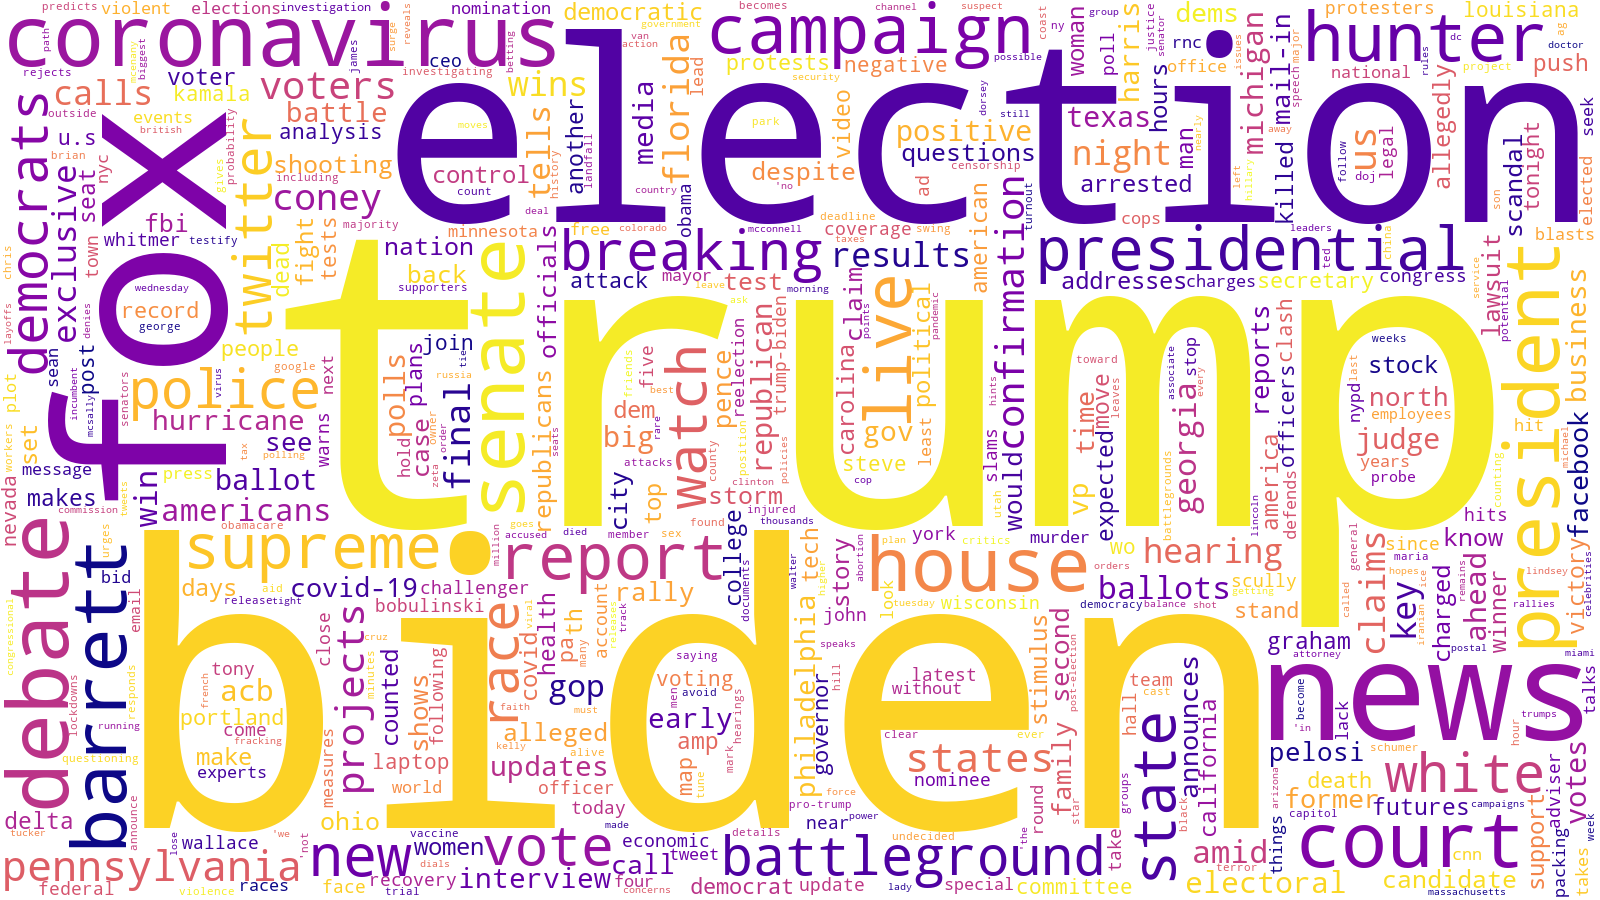

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=900,   
    prefer_horizontal=0.5, min_font_size=10, colormap='plasma',   # many other maps e.g. prism cividis viridis plasma...
    background_color='white',max_words=500,random_state=False)


wordcloud = wordcloud.fit_words(wordcount)

wordcloud = wordcloud.to_file(brand_name+'Twitter.png')

from IPython.display import Image
Image(filename=brand_name+'Twitter.png') 

A word cloud highlighting high-frequency words in large font sizes is displayed as output.

We can see which words stand out as popular terms.

We now have an interesting word cloud depicting popular terms from tweets on the brand positioned at the centre of the word cloud to highlight their relevance and importance.

One can use word cloud as an effective promotional image for marketing campaigns as it communicates the brand messaging and highlights popular terms to convey the value of the content being shared.

# 5.	**Further understanding brand perception by analyzing tweet sentiments**

Sentiment analysis is the process of retrieving information about a consumer's perception of a product or brand.

It is used to extract and quantify positive, negative, and neutral opinions as well as emotions like trust, joy, and anger from the text.

Steps involved in performing sentiment analysis:

* Step 1: Extract tweets on topic of interest

* Step 2: Extract sentiment scores from tweet text

* Step 3: Visualize sentiment scores and interpret customer perceptions

**Step 1: Extract sentiment scores from tweet text**

Set up a function that take the dataframe of tweets, and calculates the polarity, subjectivity, and a "+",  "*", "-" to depict positive, neutral, negative sentiment.  Put these calculation in three new columns in the data frame. 

Use the TextBlob() function to extract the sentiment from the text in the tweet (see Twitter assignment 1)

Use this rule:  
<pre>
     if polarity > 0.1 then positive,  
     else if polarity is less than -0.1 then negative 
     else neutral sentiment.
</pre>

the function should return the overall positive count %, negative count %, and neutral count %

In [59]:
# Set up a function to calculate sentiment columns on a dataframe. Take the dataframe as input, set up lambda
# functions to calculate the polarity and sentiment on a line of text, and "+","-","*" given a polarity. 
# Use TextBlob(text).polarity and TextBlob(text).sentiment to calculate polarity and sentiment. 
# You can then use the .apply() function with the lambda functions to calculate new columns for polarity and
# sentiment, and +,*,-
def calc_df_sentiment(df_test):
    
    # let's create columns for polarity, subjectivity and sentiment which we will use with the apply method
    fpol = lambda text : TextBlob(text).polarity
    fsub = lambda text : TextBlob(text).subjectivity
    
    # write a function to return +, * , or - depending on the polarity value
    def fsen(pol):
        if(pol > 0.1):
            sentiment = "+"
        elif(pol < -0.1):
            sentiment = "-"
        else:
            sentiment = "*"
        
        return sentiment
    
    print("Calculating polaritiy       ...")
    df_test["polarity"]     = df_test['text'].apply(fpol)
    
    print("Calculating subjectivity    ...")
    df_test["subjectivity"] = df_test['text'].apply(fsub)
    
    print("Calculating sentiment +,*,- ...")
    df_test["sentiment"]    = df_test['polarity'].apply(fsen)
    
    # do an overall sentiment breakdown
    pos_count = (df_test["sentiment"]=='+').sum()/df_test["sentiment"].count()
    neg_count = (df_test["sentiment"]=='-').sum()/df_test["sentiment"].count()
    neu_count = (df_test["sentiment"]=='*').sum()/df_test["sentiment"].count()
    print(pos_count, neg_count, neu_count)
    
    return (pos_count,neg_count,neu_count)

### Sentiment for Brand 1

In [60]:
# remember which brands we ar working with
print("Brand1 = ",brand1_name)
print("Brand2 = ",brand2_name)

Brand1 =  from_CNN
Brand2 =  from_FoxNews


In [61]:
# select which brand to work with
brand_name = 'from_CNN'
brand1_df_sen = brand1_df.copy()

In [62]:
# Calculate the polarity and sensitivity for each tweet text in the dataframe.
pos_count, neg_count, neu_count = calc_df_sentiment(brand1_df_sen)
print("\nOverall sentimement for "+brand_name)
print("Pos:",format(pos_count,'6.1%'))
print("Neg:",format(neg_count,'6.1%'))
print("Neu:",format(neu_count,'6.1%'))

Calculating polaritiy       ...
Calculating subjectivity    ...
Calculating sentiment +,*,- ...
0.30866666666666664 0.12866666666666668 0.5626666666666666

Overall sentimement for from_CNN
Pos:  30.9%
Neg:  12.9%
Neu:  56.3%


In [63]:
# show the tweet text, polarity, subjectivity, and sentiment marker
brand1_df_sen[["text", "polarity", "subjectivity", "sentiment"]].head()

,text,polarity,subjectivity,sentiment
0,BREAKING: Kamala Harris bursts through another...,0.172222,0.408333,+
1,Sen. Kamala Harris will be the United States’ ...,0.125000,0.166667,+
2,America has chosen Democrat Joe Biden as its 4...,0.000000,0.000000,*
3,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...,0.300000,0.200000,+
4,BREAKING: JOE BIDEN WINS\n\nJoe Biden will be ...,0.300000,0.200000,+


In [64]:
# set column width to max size so we can see full contents of tweet
pd.set_option('display.max_colwidth', None)

### Show top 20 positive sentiment tweets for Brand 1

Sort the dataframe text by polarity in descending order and show the top 20 tweets.

In [65]:
#brand1_df_sen["sentiment"].sort_values(by="polarity",ascending=False).head(20)
brand1_df_sen[['text','sentiment','polarity', 'subjectivity']].sort_values(by="polarity",ascending=False).head(20)

,text,sentiment,polarity,subjectivity
1094,One of Donald Trump’s biggest claims on the campaign trail is that he built the best economy in history. Is it true… https://t.co/Zq9T9Vj38J,+,1.00,0.300
1897,President Trump said he could be the “greatest fundraiser in history” if he called up the head of Wall Street firms… https://t.co/N8fBaMNCEm,+,1.00,1.000
2602,"For day two of #PrimeDay, our colleagues at @CNNUnderscored are highlighting all the best Lightning Deals. These sa… https://t.co/GuWIkyuNt5",+,1.00,0.300
1935,“I believe that the speaker is going to hang in there and try to get the best relief for people who are suffering a… https://t.co/sOPVefzJqv,+,1.00,0.300
2483,"A vaccine is still the best way to bring an end to the Covid-19 pandemic, health experts say, adding that pursuing… https://t.co/ffbUr8mPRc",+,1.00,0.300
77,US stocks surged again in what's shaping up to be the market's best week in months https://t.co/EpB1NW8Bek,+,1.00,0.300
2551,"Expert picks across style, tech, health and home. CNN Underscored: Uncovering the best\n\nhttps://t.co/1NDtFkOkdc https://t.co/8VMtrgN7aN",+,1.00,0.300
1588,"We all know that 2020 hasn't been the best year. So it would be great if we could get albums from some artists we,… https://t.co/9KXnVNlzPQ",+,0.90,0.525
1776,"After 54 years on broadcast TV, 'It's the Great Pumpkin, Charlie Brown' moves to Apple TV+ https://t.co/uoREfNWM2P",+,0.80,0.750
1754,"After 54 years on broadcast TV, 'It's the Great Pumpkin, Charlie Brown' moves to Apple TV+ https://t.co/DTYXzb5ogH",+,0.80,0.750


### Show top 20 negative sentiment tweets for Brand 1

Sort the dataframe text by polarity in ascending order and show the top 20 tweets.

In [66]:
brand1_df_sen[['text','sentiment','polarity', 'subjectivity']].sort_values(by="polarity",ascending=True).head(20)

,text,sentiment,polarity,subjectivity
1683,"Utah is experiencing ""one of the worst (coronavirus) outbreaks in the country,"" Gov. Garry Herbert said Tuesday.\n\nA… https://t.co/YLdJ2FKcLf",-,-1.000000,1.000000
1878,Trump closes his campaign by insulting Fauci for telling the truth | Analysis by @StCollinson… https://t.co/Hy6gnKphdt,-,-1.000000,1.000000
434,"October was a month of grim records in the Covid-19 pandemic, and as November begins, experts say the United States… https://t.co/WflpjqPvhm",-,-1.000000,1.000000
2174,"“I am very, very fearful of our democracy.”\nWomen’s March participants explain why they are demonstrating in Washin… https://t.co/zgqzr617kI",-,-1.000000,1.000000
1931,Trump closes his campaign by insulting Fauci for telling the truth | Analysis by @StCollinson… https://t.co/pTXLQoK5Lr,-,-1.000000,1.000000
2802,"Vaccine scientist Dr. Peter Hotez: “This winter, this November, December, January, February, could be the worst tim… https://t.co/PwknCk7eKn",-,-1.000000,1.000000
269,"As Americans head to the voting booths Tuesday, the devastating Covid-19 pandemic looms: surging across the US yet… https://t.co/cswCmamJnB",-,-1.000000,1.000000
619,"Tennis world No. 1 Novak Djokovic suffered the joint worst defeat of his career, losing 6-2 6-1 to Italy's Lorenzo… https://t.co/8kK5E7q7sl",-,-1.000000,1.000000
2461,“This is the time when we could be entering one of the worst periods of our epidemic and one of the worst periods i… https://t.co/iqpjVBxwob,-,-1.000000,1.000000
1849,"Clashes between protesters and law enforcement agents in Lagos turned bloody on Tuesday, despite a state-wide curfe… https://t.co/1Du6n37HLw",-,-0.800000,0.900000


### Sentiment for Brand 2

In [67]:
# remember which brands we ar working with
print("Brand1 = ",brand1_name)
print("Brand2 = ",brand2_name)

Brand1 =  from_CNN
Brand2 =  from_FoxNews


In [68]:
brand2_df_sen = brand2_df.copy()
pos_count, neg_count, neu_count = calc_df_sentiment(brand2_df_sen)
print("\nOverall sentimement for "+ brand2_name)
print("Pos:",format(pos_count,'6.1%'))
print("Neg:",format(neg_count,'6.1%'))
print("Neu:",format(neu_count,'6.1%'))

Calculating polaritiy       ...
Calculating subjectivity    ...
Calculating sentiment +,*,- ...
0.08133333333333333 0.04033333333333333 0.8783333333333333

Overall sentimement for from_FoxNews
Pos:   8.1%
Neg:   4.0%
Neu:  87.8%


In [69]:
# show the tweet, and sentiment
brand2_df_sen[["text", "polarity", "subjectivity", "sentiment"]].head()

,text,polarity,subjectivity,sentiment
0,"Trump accuses Biden of 'rushing to falsely pose as winner,' vows to move forward with lawsuits\n\nhttps://t.co/UlfS5c0Chw",-0.4,0.60,-
1,"Fox News projects Biden to defeat Trump, become 46th president after winning Nevada, Pennsylvania… https://t.co/kiVeczmRov",0.5,0.75,+
2,White House Press Secretary Kayleigh McEnany is denying claims that she has begun to delete posts on her government… https://t.co/2FSGa9NgDR,0.0,0.00,*
3,https://t.co/AWC4PGYjt9,0.0,0.00,*
4,Georgia Republican incumbent Sen. David Perdue and his Democratic challenger Jon Ossoff will head to a runoff race… https://t.co/F4rfh8OEnO,0.0,0.00,*


### Show top 20 positive sentiment tweets for Brand 2

In [70]:
brand2_df_sen[["text", "polarity", "subjectivity", "sentiment"]].sort_values("polarity" ,ascending=False).head(20)

,text,polarity,subjectivity,sentiment
280,Election 2020: The best not-so-political lawn signs spotted across America\n\nhttps://t.co/5ztn9DbYFG,1.000000,0.300000,+
107,Joe Biden: I feel very good about Pennsylvania\n\nhttps://t.co/JVKoR993Ba,0.910000,0.780000,+
297,"Joe Biden becomes 'an underdog' if he doesn't win Pa., says Nate Silver\n\nhttps://t.co/6XdkvXK7jJ",0.800000,0.400000,+
193,"Trump can add Arkansas to his win column, Fox News projects\n\nhttps://t.co/Le8UodBgD4 https://t.co/ALdH9Y4Soi",0.800000,0.400000,+
72,"MSNBC’s Joy Reid: Close election shows widespread ‘racism, anti-blackness, anti-wokeness’ in America\nhttps://t.co/rhs2QPUekv",0.800000,0.200000,+
79,Rosario Dawson congratulates boyfriend Cory Booker on Senate reelection: 'So proud of and grateful for you'\n\nhttps://t.co/EeUs4Nxn1Z,0.800000,1.000000,+
461,"Trump, Biden banking on job recovery plans to win election bid https://t.co/xjjkkvZC9m",0.800000,0.400000,+
177,"Trump adds South Carolina to his win tab as Lindsey Graham survives a challenge for his Senate seat, Fox News proje… https://t.co/TZmJiV5d7H",0.800000,0.400000,+
146,Joe Biden: We are on track to win this election\n\nhttps://t.co/atb2KUVWi3,0.800000,0.400000,+
399,Dodgers 1 win away from title after 32 years and more than $3.6B\nhttps://t.co/npbbiKa8vC,0.650000,0.450000,+


### Show top 20 negative sentiment tweets for Brand 2

In [71]:
brand2_df_sen[["text", "polarity", "subjectivity", "sentiment"]].sort_values("polarity" ,ascending=True).head(20)

,text,polarity,subjectivity,sentiment
508,Trump teases release of unedited '60 Minutes' footage to expose ‘vicious attempted takeout’ by Lesley Stahl\nhttps://t.co/Sol9CLk9QA,-1.000000,1.000,-
951,"Devastating Beirut blast was one of the largest non-nuclear explosions in history, scientists say\nhttps://t.co/hJ3r9HvcXL",-1.000000,1.000,-
588,WATCH: Terrifying video shows moment suspect throws torch into Seattle cop car with officer inside\nhttps://t.co/BErqMpLRGZ,-1.000000,1.000,-
412,"RT @FoxBusiness: Dow drops 650 points as S&amp;P 500, Nasdaq post worst day since September https://t.co/1OItTOhFGl",-1.000000,1.000,-
58,SHOCKING VIDEO: NYU grad spits in cop's face while screaming 'fascist'\n\nhttps://t.co/SFs1iiYqXG https://t.co/Zjp61Md3hG,-1.000000,1.000,-
848,Michigan Gov. Whitmer: Trump provided 'rallying cry' to hate groups as kidnapping plot thwarted\nhttps://t.co/VJntrAI2fb,-0.800000,0.900,-
68,Paulina Porizkova says disagreements among Americans over 2020 election have fueled 'frenzy of hate'\nhttps://t.co/2JPEepngUV,-0.800000,0.900,-
488,Potentially violent militia groups could be rampant leading up to elections in these five states: report https://t.co/JjsGXXXhe5,-0.800000,1.000,-
327,"Austin sees spikes in violent crime, officer retirements after defund police vote\n\nhttps://t.co/HzDNv3nPoP",-0.800000,1.000,-
718,"'TERRIBLE MISTAKE': Sen. Mike Lee rails against court packing, recalls past Biden speech\nhttps://t.co/cW95Sz67vc",-0.625000,0.625,-


**Step 2: Visualize sentiment scores**

Set up a pandas series with polarity as values and Created as the index.  We can then resample the series every 24 hours. calculate the mean polarity, and call the plot method on the series to see the polarity trend.

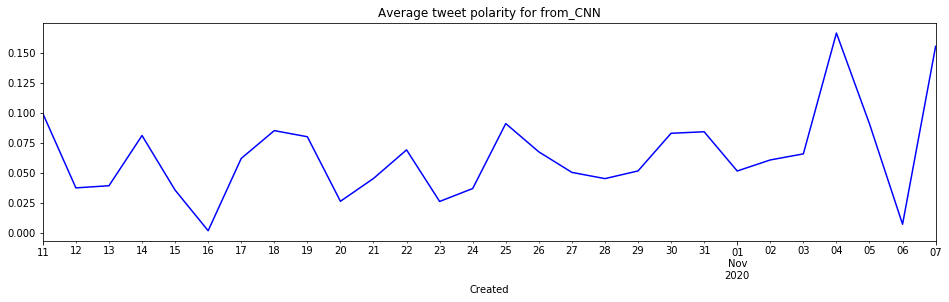

In [72]:
# Let's add relevant data to the dataframe
tpol_brand1 = pd.Series(data=brand1_df_sen['polarity'].values, index=brand1_df['Created'], name=brand1_name).tz_localize(None)

# downsample data to on tweets to a time interval in which we can count tweets sent
tpol_brand1_sample = tpol_brand1.resample("24H").mean()

# downsample data to on tweets to a time interval in which we can count tweets sent
tpol_brand1_sample.plot(figsize=(16,4), color='b',title = "Average tweet polarity for "+brand1_name)


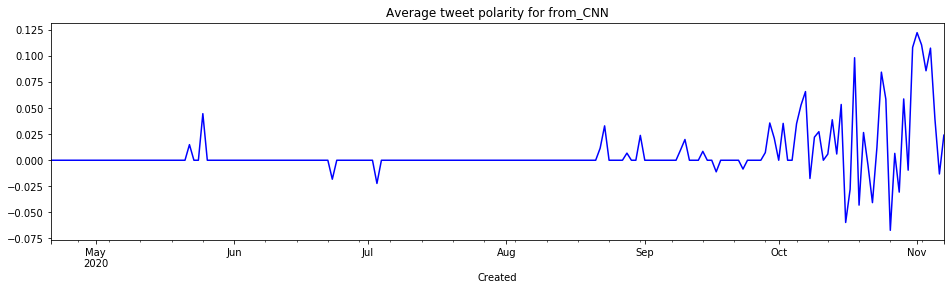

In [73]:
# Let's add relevant data to the dataframe
tpol_brand2 = pd.Series(data=brand2_df_sen['polarity'].values, index=brand2_df['Created'],name=brand2_name).tz_localize(None)

# downsample data to on tweets to a time interval in which we can count tweets sent
tpol_brand2_sample = tpol_brand2.resample("24H").mean()

# downsample data to on tweets to a time interval in which we can count tweets sent
tpol_brand2_sample.plot(figsize=(16,4), color='b',title = "Average tweet polarity for "+brand1_name)




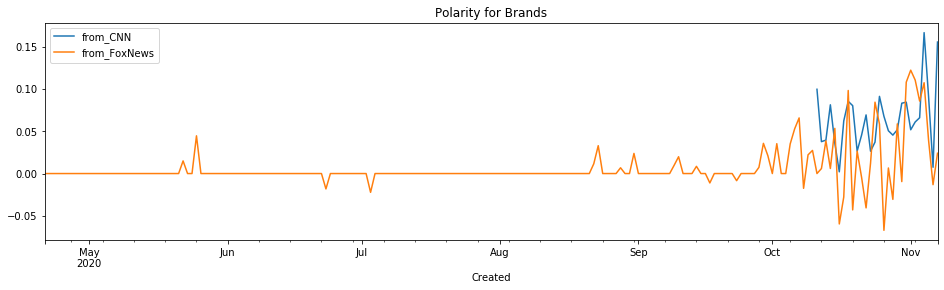

In [74]:
# Concatenate the two series into a dataframe that we can plot side by side using the pandas dataframe plot method.
pd.concat([tpol_brand1_sample, tpol_brand2_sample], axis = 1).plot(figsize=(16,4),title="Polarity for Brands")

It is interesting to see that the average sentiment for one brand is higher than the other. 

Sentiment analysis is useful in social media monitoring since it gives an overview of people's sentiments.
